In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster         # For KMeans class
import sklearn.mixture         # For GaussianMixture class
import sklearn.preprocessing   # For scale function
import mpl_toolkits.mplot3d  

image = plt.imread('ladybug.png')
RGB = image.reshape(-1, 3)

In [2]:
def run_kmeans(data, k):
    """
    Runs K-means on an NxD array using k clusters.
    
    Returns a KxD matrix of centroids and a length-N vector of labels (cluster assignments).
    """
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=0).fit(data)
    return kmeans.cluster_centers_, kmeans.labels_

centroids, labels = run_kmeans(RGB, k=5)

print(centroids)
print(labels, len(labels))

[[0.9183005  0.11951435 0.04882488]
 [0.2199335  0.4692985  0.0934843 ]
 [0.8889067  0.6727412  0.6811435 ]
 [0.07332435 0.23711269 0.04663843]
 [0.39092913 0.5740284  0.28999868]]
[4 1 1 ... 4 4 4] 10000


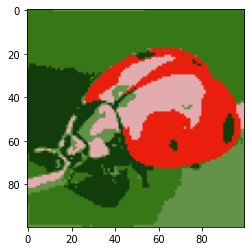

In [4]:
# Create a new (10000,3) ndarray where values in row i are copied from centroids[labels[i],:]
RGB_recoloured = centroids[labels]
plt.imshow(RGB_recoloured.reshape(image.shape));

Text(0.5, 1.0, 'Spatial clustering by RGBXY with k=6')

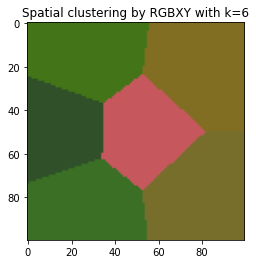

In [5]:
xv, yv = np.meshgrid(np.arange(0,image.shape[0],dtype=np.float32) , np.arange(0,image.shape[1],dtype=np.float32))
RGBXY = np.column_stack((image.reshape(-1,3), xv.reshape(-1,1), yv.reshape(-1,1)))
centroids, labels = run_kmeans(RGBXY, k=6)
RGBXY_recoloured = centroids[labels,:3]
plt.imshow(RGBXY_recoloured.reshape(image.shape))
plt.title("Spatial clustering by RGBXY with k=6")

Text(0.5, 1.0, 'Spatial clustering by RGBXY with k=50')

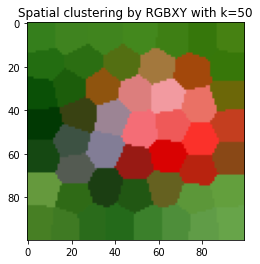

In [6]:
centroids, labels = run_kmeans(RGBXY, k=50)
RGBXY_recoloured = centroids[labels,:3]
plt.imshow(RGBXY_recoloured.reshape(image.shape))
plt.title("Spatial clustering by RGBXY with k=50")

Text(0.5, 1.0, 'Spatial clustering by RGBXY with k=50 and scaled x and y values')

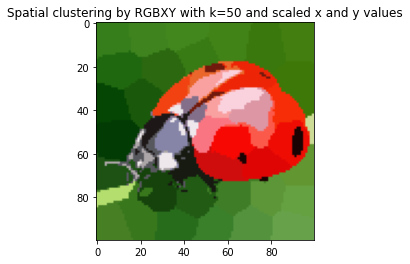

In [7]:
RGBXY_scaled = RGBXY * np.array([1,1,1,.02,.02]) 
centroids, labels = run_kmeans(RGBXY_scaled, k=50)
RGBXY_recoloured = centroids[labels,:3]
plt.imshow(RGBXY_recoloured.reshape(image.shape))
plt.title("Spatial clustering by RGBXY with k=50 and scaled x and y values")
